##  Cifar-100 이미지 분류 과제


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed=2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [6]:
from tensorflow.keras.datasets import cifar100
(X_train,y_train),(X_test,y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 4s 0us/step


In [7]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [8]:
class_names=['apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly','camel','can','castle','caterpillar','cattle','chair','chimpanzee','clock','cloud','cockroach','couch','crab','crocodile','cup','dinosaur','dolphin','elephant','flatfish','forest','fox','girl','hamster','house','kangaroo','keyboard','lamp','lawn_mower','leopard','lion','lizard','lobster','man','maple_tree','motorcycle','mountain','mouse','mushroom','oak_tree','orange','orchid','otter','palm_tree','pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum','rabbit','raccoon','ray','road','rocket','rose','sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider','squirrel','streetcar','sunflower','sweet_pepper','table','tank','telephone','television','tiger','tractor','train','trout','tulip','turtle','wardrobe','whale','willow_tree','wolf','woman','worm']

In [9]:
#xdata -scaling
X_train=X_train/255.
X_test=X_test/255.


In [10]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test=to_categorical(y_test)

- 모델 정의/학습/평가

In [55]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D,Flatten, MaxPooling2D, AveragePooling2D,Dropout

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model =Sequential([
                   Conv2D(32, kernel_size=(3,3), input_shape=(32,32,3),padding='same',activation='relu'),
                    #= MaxPooling2D(pool_size=(2,2))
                   # input_shape=(32,32,3) = X_train.shape[1:]
                    Conv2D(64, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'),
                    Conv2D(128, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.25),
                    Flatten(), 
                    Dense(512,activation='relu'),
                    Dropout(0.5),
                    Dense(100,activation='softmax')
])
model.summary()



In [18]:
model.compile(
    optimizer=RMSprop(learning_rate=0.0001,decay=1e-6),
              loss='categorical_crossentropy',metrics=['accuracy'])


In [19]:
model_path = 'best-cifar100-v1.h5'
mc=ModelCheckpoint(model_path,save_best_only=True,verbose=1)
es=EarlyStopping(patience=10)

In [ ]:
hist=model.fit(
    X_train,Y_train,validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[mc,es]

)

In [21]:
best_model = load_model(model_path)
best_model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.0929 - accuracy: 0.4643


[2.092912435531616, 0.4643000066280365]

Text(0.5, 0, 'Epoch')

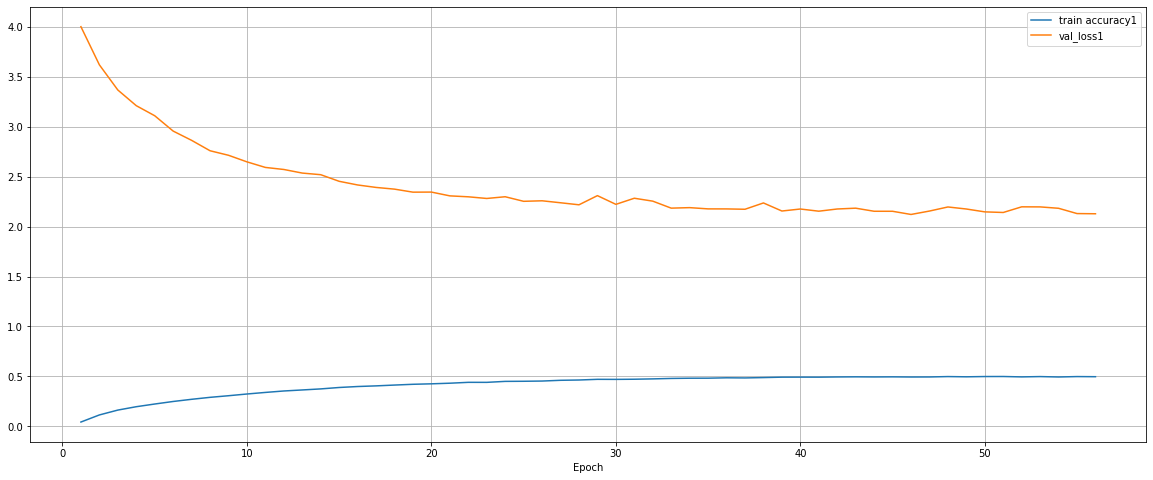

In [22]:
y_acc=hist.history['accuracy']
y_vloss=hist.history['val_loss']
xs=np.arange(1, len(y_acc)+1)
plt.figure(figsize=(20,8))
plt.plot(xs,y_acc,label='train accuracy1')
plt.plot(xs,y_vloss,label='val_loss1')
plt.legend(),
plt.grid(),
plt.xlabel('Epoch')

## 2차 시도
- 드롭아웃 안함
- learning_rate=0.001로 늘림

loss: 2.4880 - accuracy: 0.4009

Epoch 1/100
1241/1250 [============================>.] - ETA: 0s - loss: 3.6623 - accuracy: 0.1516
Epoch 1: val_loss improved from inf to 3.20076, saving model to best-cifar100-v2.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 3.6595 - accuracy: 0.1521 - val_loss: 3.2008 - val_accuracy: 0.2330
Epoch 2/100
1248/1250 [============================>.] - ETA: 0s - loss: 2.7567 - accuracy: 0.3132
Epoch 2: val_loss improved from 3.20076 to 2.70331, saving model to best-cifar100-v2.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 2.7570 - accuracy: 0.3132 - val_loss: 2.7033 - val_accuracy: 0.3304
Epoch 3/100
1246/1250 [============================>.] - ETA: 0s - loss: 2.2506 - accuracy: 0.4222
Epoch 3: val_loss improved from 2.70331 to 2.54166, saving model to best-cifar100-v2.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 2.2506 - accuracy: 0.4223 - val_loss: 2.5417 - val_accuracy: 0.3712
Epoch 4/100
1244/1250 [=====================

Text(0.5, 0, 'Epoch')

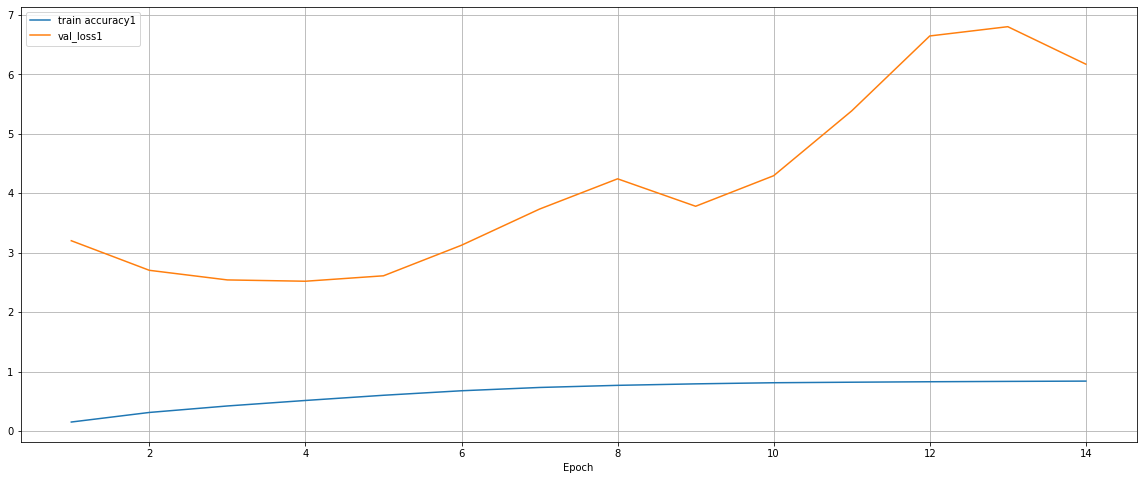

In [23]:
model2 =Sequential([
                   Conv2D(32, kernel_size=(3,3), input_shape=(32,32,3),padding='same',activation='relu'),
                    #= MaxPooling2D(pool_size=(2,2))
                   # input_shape=(32,32,3) = X_train.shape[1:]
                    Conv2D(64, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'),
                    Conv2D(128, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Flatten(), 
                    Dense(512,activation='relu'),
                    Dense(100,activation='softmax')
])

model2.compile(
    optimizer=RMSprop(learning_rate=0.001,decay=1e-6),
              loss='categorical_crossentropy',metrics=['accuracy'])
model_path = 'best-cifar100-v2.h5'
mc=ModelCheckpoint(model_path,save_best_only=True,verbose=1)
es=EarlyStopping(patience=10)

hist2=model2.fit(
    X_train,Y_train,validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[mc,es]

)
best_model = load_model(model_path)
best_model.evaluate(X_test,Y_test)
y_acc=hist2.history['accuracy']
y_vloss=hist2.history['val_loss']
xs=np.arange(1, len(y_acc)+1)
plt.figure(figsize=(20,8))
plt.plot(xs,y_acc,label='train accuracy1')
plt.plot(xs,y_vloss,label='val_loss1')
plt.legend(),
plt.grid(),
plt.xlabel('Epoch')

In [24]:
best_model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 4ms/step - loss: 2.4880 - accuracy: 0.4009


[2.487962484359741, 0.4009000062942505]

## 3차 시도
- 다시 드롭아웃. 이번엔 오히려 더 늘려봄 
- learning_rate=0.001로 늘림
- [2.5803401470184326, 0.3424000144004822]

loss: 2.4880 - accuracy: 0.4009

Epoch 1/100
1242/1250 [============================>.] - ETA: 0s - loss: 3.9826 - accuracy: 0.0961
Epoch 1: val_loss improved from inf to 3.51837, saving model to best-cifar100-v2.h5
1250/1250 [==============================] - 10s 7ms/step - loss: 3.9805 - accuracy: 0.0966 - val_loss: 3.5184 - val_accuracy: 0.1747
Epoch 2/100
1244/1250 [============================>.] - ETA: 0s - loss: 3.3532 - accuracy: 0.1984
Epoch 2: val_loss improved from 3.51837 to 3.04358, saving model to best-cifar100-v2.h5
1250/1250 [==============================] - 8s 7ms/step - loss: 3.3523 - accuracy: 0.1986 - val_loss: 3.0436 - val_accuracy: 0.2618
Epoch 3/100
1250/1250 [==============================] - ETA: 0s - loss: 3.0893 - accuracy: 0.2484
Epoch 3: val_loss improved from 3.04358 to 2.87270, saving model to best-cifar100-v2.h5
1250/1250 [==============================] - 8s 7ms/step - loss: 3.0893 - accuracy: 0.2484 - val_loss: 2.8727 - val_accuracy: 0.2931
Epoch 4/100
1250/1250 [====================

Text(0.5, 0, 'Epoch')

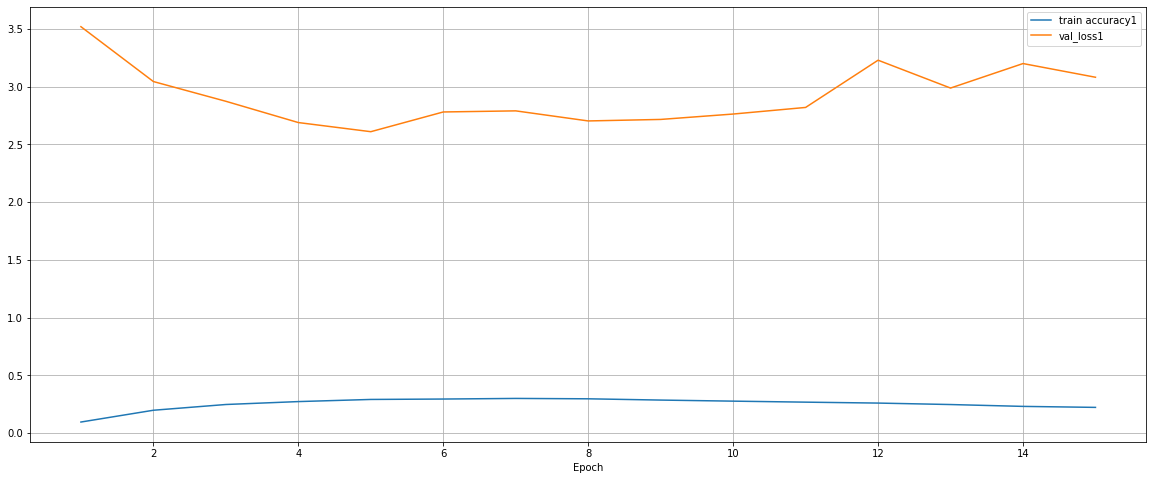

In [25]:
model2  =Sequential([
                   Conv2D(32, kernel_size=(3,3), input_shape=(32,32,3),padding='same',activation='relu'),
                    #= MaxPooling2D(pool_size=(2,2))
                   # input_shape=(32,32,3) = X_train.shape[1:]
                    Conv2D(64, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.4),
                    Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'),
                    Conv2D(128, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.4),
                    Flatten(), 
                    Dense(512,activation='relu'),
                    Dropout(0.5),
                    Dense(100,activation='softmax')
])

model2.compile(
    optimizer=RMSprop(learning_rate=0.001,decay=1e-6),
              loss='categorical_crossentropy',metrics=['accuracy'])
model_path = 'best-cifar100-v2.h5'
mc=ModelCheckpoint(model_path,save_best_only=True,verbose=1)
es=EarlyStopping(patience=10)

hist2=model2.fit(
    X_train,Y_train,validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[mc,es]

)
best_model = load_model(model_path)
best_model.evaluate(X_test,Y_test)
y_acc=hist2.history['accuracy']
y_vloss=hist2.history['val_loss']
xs=np.arange(1, len(y_acc)+1)
plt.figure(figsize=(20,8))
plt.plot(xs,y_acc,label='train accuracy1')
plt.plot(xs,y_vloss,label='val_loss1')
plt.legend(),
plt.grid(),
plt.xlabel('Epoch')

In [26]:
best_model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 4ms/step - loss: 2.5803 - accuracy: 0.3424


[2.5803401470184326, 0.3424000144004822]

## 4차 시도
- 다시 드롭아웃. 이번엔 오히려 더 늘려봄 
- learning_rate=0.001로 늘림
- 모델 막 건드렸더니 더 망함
-[2.7462422847747803, 0.3147999942302704]

In [27]:
model4  =Sequential()

model4.add(Conv2D(input_shape = (64, 64, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
print(model4.output_shape)


(None, 64, 64, 10)


In [30]:
model4  =Sequential([
                   Conv2D(64, kernel_size=(3,3), input_shape=(32,32,3),padding='same',activation='relu'),
                    Conv2D(64, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.5),
                    Conv2D(128, kernel_size=(3,3), padding='same',activation='relu'),
                    Conv2D(128, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.5),
                    Flatten(), 
                    Dense(512,activation='relu'),
                    Dropout(0.5),
                    Dense(100,activation='softmax')
])
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_30 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 15, 15, 64)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 15, 15, 128)       73856     
                                                                 
 conv2d_32 (Conv2D)          (None, 13, 13, 128)       147584    
                                                      

Epoch 1/100
1247/1250 [============================>.] - ETA: 0s - loss: 4.0442 - accuracy: 0.0857
Epoch 1: val_loss improved from inf to 3.71335, saving model to best-cifar100-v4.h5
1250/1250 [==============================] - 10s 7ms/step - loss: 4.0432 - accuracy: 0.0859 - val_loss: 3.7134 - val_accuracy: 0.1427
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 3.4539 - accuracy: 0.1749
Epoch 2: val_loss improved from 3.71335 to 3.13582, saving model to best-cifar100-v4.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 3.4539 - accuracy: 0.1749 - val_loss: 3.1358 - val_accuracy: 0.2462
Epoch 3/100
1246/1250 [============================>.] - ETA: 0s - loss: 3.2196 - accuracy: 0.2263
Epoch 3: val_loss improved from 3.13582 to 2.94222, saving model to best-cifar100-v4.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 3.2199 - accuracy: 0.2263 - val_loss: 2.9422 - val_accuracy: 0.2780
Epoch 4/100
1246/1250 [====================

Text(0.5, 0, 'Epoch')

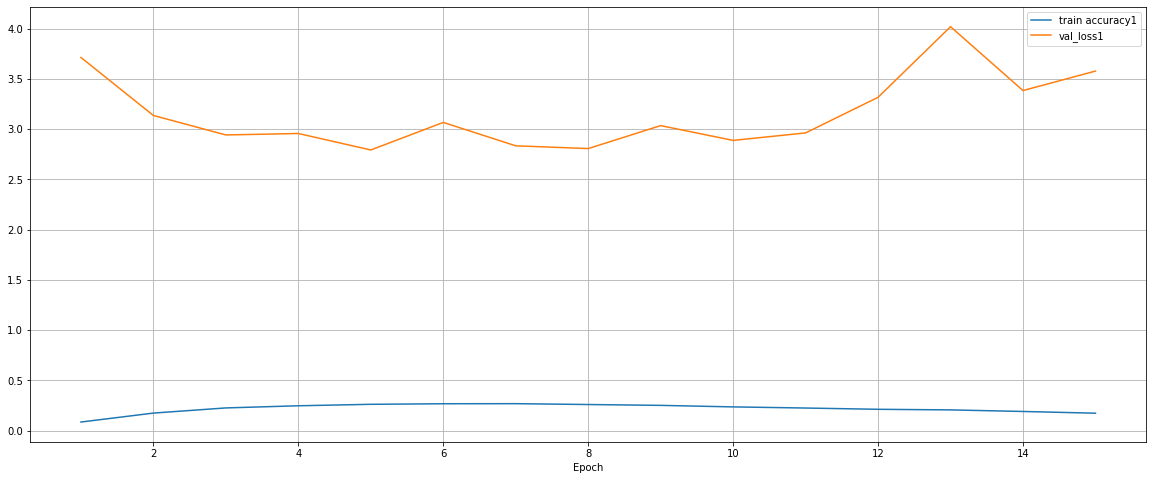

In [31]:

model4.compile(
    optimizer=RMSprop(learning_rate=0.001,decay=1e-6),
              loss='categorical_crossentropy',metrics=['accuracy'])
model_path = 'best-cifar100-v4.h5'
mc=ModelCheckpoint(model_path,save_best_only=True,verbose=1)
es=EarlyStopping(patience=10)

hist4=model4.fit(
    X_train,Y_train,validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[mc,es]

)
best_model = load_model(model_path)
best_model.evaluate(X_test,Y_test)
y_acc=hist4.history['accuracy']
y_vloss=hist4.history['val_loss']
xs4=np.arange(1, len(y_acc)+1)
plt.figure(figsize=(20,8))
plt.plot(xs4,y_acc,label='train accuracy1')
plt.plot(xs4,y_vloss,label='val_loss1')
plt.legend(),
plt.grid(),
plt.xlabel('Epoch')

In [32]:
best_model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 4ms/step - loss: 2.7462 - accuracy: 0.3148


[2.7462422847747803, 0.3147999942302704]

## 5차 시도
-드롭아웃 0.3-0.3-0.4
- learning_rate=0.002로 늘림
- 한층 더 넣어봄.
- 또 개망함
[3.086824417114258, 0.25099998712539673]

In [33]:
model5  =Sequential([
                   Conv2D(64, kernel_size=(3,3), input_shape=(32,32,3),padding='same',activation='relu'),
                    Conv2D(64, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.3),
                    Conv2D(128, kernel_size=(3,3), padding='same',activation='relu'),
                    Conv2D(128, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.3),
                    Conv2D(256, kernel_size=(3,3), padding='same',activation='relu'),
                    Conv2D(256, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.3),
                    Flatten(), 
                    Dense(512,activation='relu'),
                    Dropout(0.4),
                    Dense(100,activation='softmax')
])
model5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_34 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 15, 15, 64)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 15, 15, 128)       73856     
                                                                 
 conv2d_36 (Conv2D)          (None, 13, 13, 128)       147584    
                                                      

Epoch 1/100
622/625 [============================>.] - ETA: 0s - loss: 4.5243 - accuracy: 0.0235
Epoch 1: val_loss improved from inf to 4.26479, saving model to best-cifar100-v5.h5
625/625 [==============================] - 9s 12ms/step - loss: 4.5231 - accuracy: 0.0236 - val_loss: 4.2648 - val_accuracy: 0.0433
Epoch 2/100
622/625 [============================>.] - ETA: 0s - loss: 3.9938 - accuracy: 0.0831
Epoch 2: val_loss improved from 4.26479 to 3.67922, saving model to best-cifar100-v5.h5
625/625 [==============================] - 7s 12ms/step - loss: 3.9929 - accuracy: 0.0830 - val_loss: 3.6792 - val_accuracy: 0.1408
Epoch 3/100
621/625 [============================>.] - ETA: 0s - loss: 3.6871 - accuracy: 0.1358
Epoch 3: val_loss improved from 3.67922 to 3.42982, saving model to best-cifar100-v5.h5
625/625 [==============================] - 7s 12ms/step - loss: 3.6872 - accuracy: 0.1358 - val_loss: 3.4298 - val_accuracy: 0.1808
Epoch 4/100
624/625 [============================>.] 

Text(0.5, 0, 'Epoch')

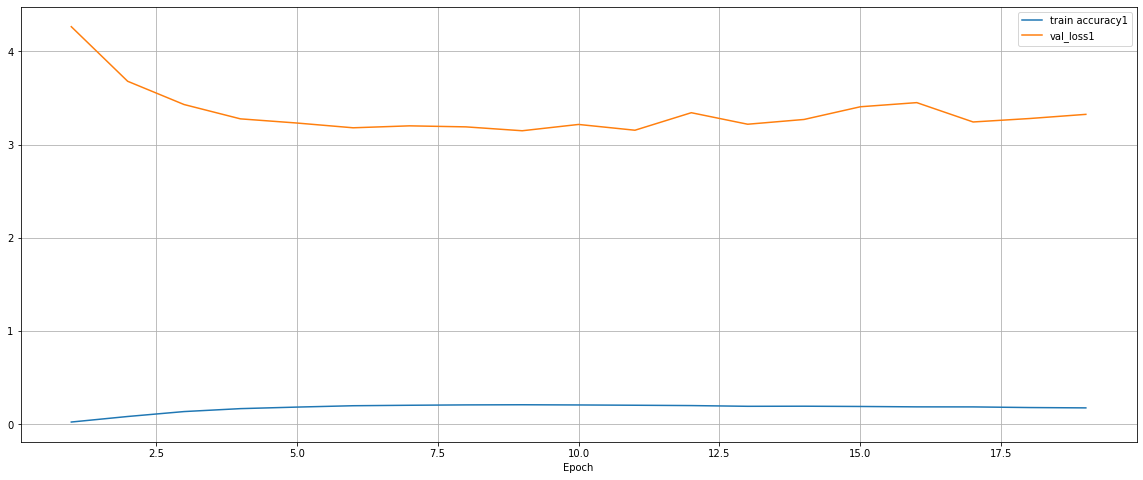

In [34]:

model5.compile(
    optimizer=RMSprop(learning_rate=0.002,decay=1e-6),
              loss='categorical_crossentropy',metrics=['accuracy'])
model_path = 'best-cifar100-v5.h5'
mc=ModelCheckpoint(model_path,save_best_only=True,verbose=1)
es=EarlyStopping(patience=10)

hist5=model5.fit(
    X_train,Y_train,validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[mc,es]

)
best_model = load_model(model_path)
best_model.evaluate(X_test,Y_test)
y_acc=hist5.history['accuracy']
y_vloss=hist5.history['val_loss']
xs5=np.arange(1, len(y_acc)+1)
plt.figure(figsize=(20,8))
plt.plot(xs5,y_acc,label='train accuracy1')
plt.plot(xs5,y_vloss,label='val_loss1')
plt.legend(),
plt.grid(),
plt.xlabel('Epoch')

In [35]:
best_model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 4ms/step - loss: 3.0868 - accuracy: 0.2510


[3.086824417114258, 0.25099998712539673]

## 6차 시도
-드롭아웃 0.1-0.1-0.3
- learning_rate=0.001
-다시 간단하게
[2.3263816833496094, 0.40939998626708984]

In [40]:
model6  =Sequential([
                   Conv2D(64, kernel_size=(3,3), input_shape=(32,32,3),padding='same',activation='relu'),
                    Conv2D(64, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.1),
                    Conv2D(128, kernel_size=(3,3), padding='same',activation='relu'),
                    Conv2D(128, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.1),
                    Flatten(), 
                    Dense(512,activation='relu'),
                    Dropout(0.3),
                    Dense(100,activation='softmax')
])
model6.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_52 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 15, 15, 64)        0         
                                                                 
 conv2d_53 (Conv2D)          (None, 15, 15, 128)       73856     
                                                                 
 conv2d_54 (Conv2D)          (None, 13, 13, 128)       147584    
                                                     

Epoch 1/100
1245/1250 [============================>.] - ETA: 0s - loss: 3.8146 - accuracy: 0.1253
Epoch 1: val_loss improved from inf to 3.24431, saving model to best-cifar100-v6.h5
1250/1250 [==============================] - 10s 8ms/step - loss: 3.8128 - accuracy: 0.1255 - val_loss: 3.2443 - val_accuracy: 0.2184
Epoch 2/100
1243/1250 [============================>.] - ETA: 0s - loss: 2.9775 - accuracy: 0.2708
Epoch 2: val_loss improved from 3.24431 to 2.72386, saving model to best-cifar100-v6.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 2.9760 - accuracy: 0.2712 - val_loss: 2.7239 - val_accuracy: 0.3235
Epoch 3/100
1247/1250 [============================>.] - ETA: 0s - loss: 2.5671 - accuracy: 0.3540
Epoch 3: val_loss improved from 2.72386 to 2.62186, saving model to best-cifar100-v6.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 2.5666 - accuracy: 0.3541 - val_loss: 2.6219 - val_accuracy: 0.3478
Epoch 4/100
1250/1250 [====================

Text(0.5, 0, 'Epoch')

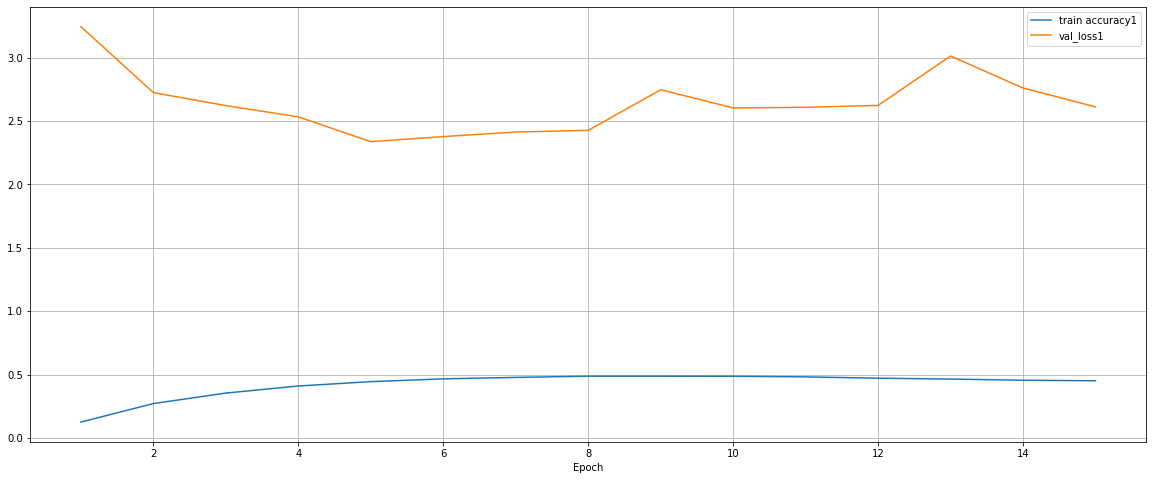

In [41]:

model6.compile(
    optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',metrics=['accuracy'])
model_path = 'best-cifar100-v6.h5'
mc=ModelCheckpoint(model_path,save_best_only=True,verbose=1)
es=EarlyStopping(patience=10)

hist6=model6.fit(
    X_train,Y_train,validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[mc,es]

)
best_model = load_model(model_path)
best_model.evaluate(X_test,Y_test)
y_acc=hist6.history['accuracy']
y_vloss=hist6.history['val_loss']
xs6=np.arange(1, len(y_acc)+1)
plt.figure(figsize=(20,8))
plt.plot(xs6,y_acc,label='train accuracy1')
plt.plot(xs6,y_vloss,label='val_loss1')
plt.legend(),
plt.grid(),
plt.xlabel('Epoch')

In [42]:
best_model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 4ms/step - loss: 2.3264 - accuracy: 0.4094


[2.3263816833496094, 0.40939998626708984]

## 7차 시도
-드롭아웃 0.1-0.1-0.3
- learning_rate=0.001
-다시 간단하게
- 옵티마이저 아담으로
[2.3782424926757812, 0.3939000070095062]


In [44]:
model7  =Sequential([
                   Conv2D(64, kernel_size=(3,3), input_shape=(32,32,3),padding='same',activation='relu'),
                    Conv2D(64, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.1),
                    Conv2D(128, kernel_size=(3,3), padding='same',activation='relu'),
                    Conv2D(128, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.1),
                    Flatten(), 
                    Dense(512,activation='relu'),
                    Dropout(0.3),
                    Dense(100,activation='softmax')
])
model7.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_60 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 15, 15, 64)        0         
                                                                 
 conv2d_61 (Conv2D)          (None, 15, 15, 128)       73856     
                                                                 
 conv2d_62 (Conv2D)          (None, 13, 13, 128)       147584    
                                                     

Epoch 1/100
1248/1250 [============================>.] - ETA: 0s - loss: 3.8850 - accuracy: 0.1034
Epoch 1: val_loss improved from inf to 3.35301, saving model to best-cifar100-v6.h5
1250/1250 [==============================] - 10s 7ms/step - loss: 3.8844 - accuracy: 0.1034 - val_loss: 3.3530 - val_accuracy: 0.1956
Epoch 2/100
1244/1250 [============================>.] - ETA: 0s - loss: 3.0769 - accuracy: 0.2458
Epoch 2: val_loss improved from 3.35301 to 2.87667, saving model to best-cifar100-v6.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 3.0761 - accuracy: 0.2457 - val_loss: 2.8767 - val_accuracy: 0.2951
Epoch 3/100
1247/1250 [============================>.] - ETA: 0s - loss: 2.6847 - accuracy: 0.3179
Epoch 3: val_loss improved from 2.87667 to 2.62619, saving model to best-cifar100-v6.h5
1250/1250 [==============================] - 8s 7ms/step - loss: 2.6843 - accuracy: 0.3179 - val_loss: 2.6262 - val_accuracy: 0.3373
Epoch 4/100
1249/1250 [====================

Text(0.5, 0, 'Epoch')

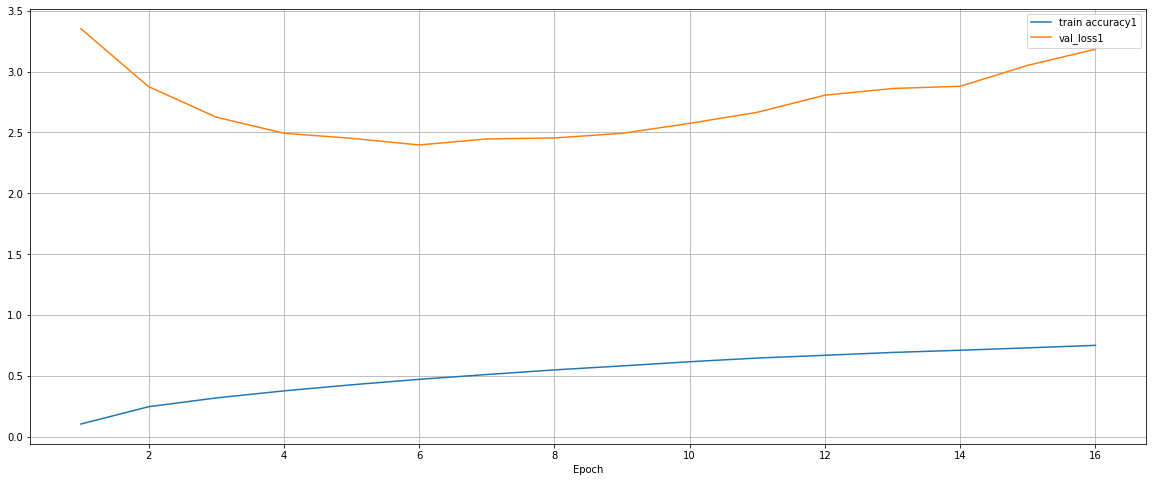

In [47]:
from tensorflow.keras.optimizers import Adam
model7.compile(
    optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',metrics=['accuracy'])
model_path = 'best-cifar100-v6.h5'
mc=ModelCheckpoint(model_path,save_best_only=True,verbose=1)
es=EarlyStopping(patience=10)

hist7=model7.fit(
    X_train,Y_train,validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[mc,es]

)
best_model = load_model(model_path)
best_model.evaluate(X_test,Y_test)
y_acc=hist7.history['accuracy']
y_vloss=hist7.history['val_loss']
xs7=np.arange(1, len(y_acc)+1)
plt.figure(figsize=(20,8))
plt.plot(xs7,y_acc,label='train accuracy1')
plt.plot(xs7,y_vloss,label='val_loss1')
plt.legend(),
plt.grid(),
plt.xlabel('Epoch')

In [48]:
best_model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 4ms/step - loss: 2.3782 - accuracy: 0.3939


[2.3782424926757812, 0.3939000070095062]

## 8차 시도
-드롭아웃 0.3-0.3-0.5
- learning_rate=0.002
-다시 간단하게
- 옵티마이저 =아담
- [2.8589088916778564, 0.29750001430511475]

In [49]:
model8  =Sequential([
                   Conv2D(64, kernel_size=(3,3), input_shape=(32,32,3),padding='same',activation='relu'),
                    Conv2D(64, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.3),
                    Conv2D(128, kernel_size=(3,3), padding='same',activation='relu'),
                    Conv2D(128, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.3),
                    Flatten(), 
                    Dense(512,activation='relu'),
                    Dropout(0.5),
                    Dense(100,activation='softmax')
])
model8.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_64 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 dropout_42 (Dropout)        (None, 15, 15, 64)        0         
                                                                 
 conv2d_65 (Conv2D)          (None, 15, 15, 128)       73856     
                                                                 
 conv2d_66 (Conv2D)          (None, 13, 13, 128)       147584    
                                                     

Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 4.2206 - accuracy: 0.0520
Epoch 1: val_loss improved from inf to 3.99808, saving model to best-cifar100-v8.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 4.2206 - accuracy: 0.0520 - val_loss: 3.9981 - val_accuracy: 0.0872
Epoch 2/100
1242/1250 [============================>.] - ETA: 0s - loss: 3.8710 - accuracy: 0.0971
Epoch 2: val_loss improved from 3.99808 to 3.71141, saving model to best-cifar100-v8.h5
1250/1250 [==============================] - 8s 7ms/step - loss: 3.8703 - accuracy: 0.0973 - val_loss: 3.7114 - val_accuracy: 0.1377
Epoch 3/100
1243/1250 [============================>.] - ETA: 0s - loss: 3.6625 - accuracy: 0.1352
Epoch 3: val_loss improved from 3.71141 to 3.49591, saving model to best-cifar100-v8.h5
1250/1250 [==============================] - 8s 7ms/step - loss: 3.6618 - accuracy: 0.1352 - val_loss: 3.4959 - val_accuracy: 0.1713
Epoch 4/100
1246/1250 [=====================

Text(0.5, 0, 'Epoch')

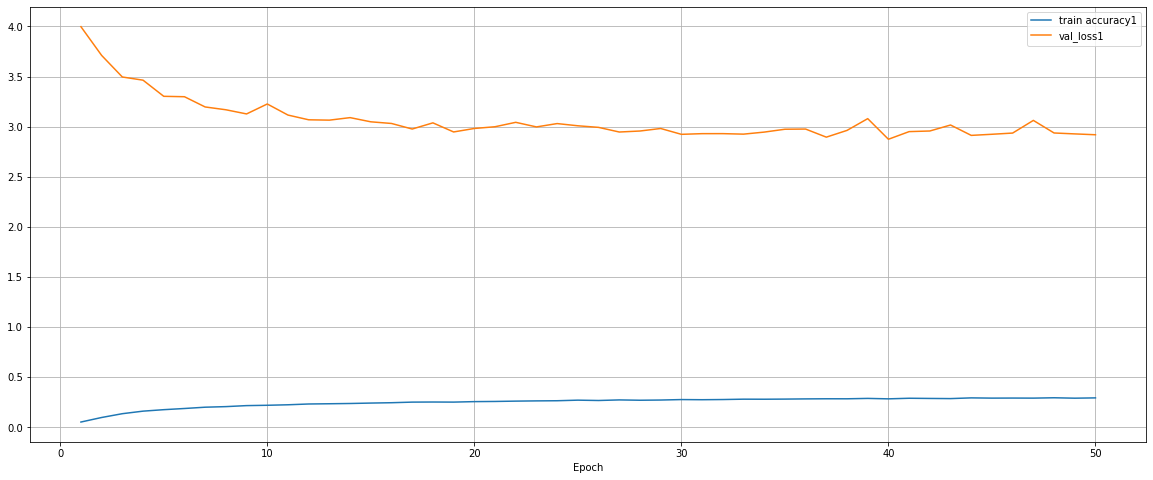

In [50]:
from tensorflow.keras.optimizers import Adam
model8.compile(
    optimizer=Adam(learning_rate=0.002),
              loss='categorical_crossentropy',metrics=['accuracy'])
model_path = 'best-cifar100-v8.h5'
mc=ModelCheckpoint(model_path,save_best_only=True,verbose=1)
es=EarlyStopping(patience=10)

hist8=model8.fit(
    X_train,Y_train,validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[mc,es]

)
best_model = load_model(model_path)
best_model.evaluate(X_test,Y_test)
y_acc=hist8.history['accuracy']
y_vloss=hist8.history['val_loss']
xs8=np.arange(1, len(y_acc)+1)
plt.figure(figsize=(20,8))
plt.plot(xs8,y_acc,label='train accuracy1')
plt.plot(xs8,y_vloss,label='val_loss1')
plt.legend(),
plt.grid(),
plt.xlabel('Epoch')

In [51]:
best_model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 4ms/step - loss: 2.8589 - accuracy: 0.2975


[2.8589088916778564, 0.29750001430511475]

## 9차 시도
-드롭아웃 0.3-0.3-0.5
- 옵티마이저 =아담
- learning_rate=0.001
- AveragePooling2D
- [2.2051594257354736, 0.4334000051021576]

In [56]:
model9  =Sequential([
                   Conv2D(64, kernel_size=(3,3), input_shape=(32,32,3),padding='same',activation='relu'),
                    Conv2D(64, kernel_size=(3,3),activation='relu'),
                    AveragePooling2D(),
                    Dropout(0.3),
                    Conv2D(128, kernel_size=(3,3), padding='same',activation='relu'),
                    Conv2D(128, kernel_size=(3,3),activation='relu'),
                    AveragePooling2D(),
                    Dropout(0.3),
                    Flatten(), 
                    Dense(512,activation='relu'),
                    Dropout(0.5),
                    Dense(100,activation='softmax')
])
model9.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_76 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 64)       0         
 ooling2D)                                                       
                                                                 
 dropout_48 (Dropout)        (None, 15, 15, 64)        0         
                                                                 
 conv2d_77 (Conv2D)          (None, 15, 15, 128)       73856     
                                                                 
 conv2d_78 (Conv2D)          (None, 13, 13, 128)       147584    
                                                     

Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 4.1319 - accuracy: 0.0652
Epoch 1: val_loss improved from inf to 3.71931, saving model to best-cifar100-v9.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 4.1319 - accuracy: 0.0652 - val_loss: 3.7193 - val_accuracy: 0.1358
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 3.5414 - accuracy: 0.1583
Epoch 2: val_loss improved from 3.71931 to 3.18922, saving model to best-cifar100-v9.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 3.5414 - accuracy: 0.1583 - val_loss: 3.1892 - val_accuracy: 0.2292
Epoch 3/100
1246/1250 [============================>.] - ETA: 0s - loss: 3.2019 - accuracy: 0.2204
Epoch 3: val_loss improved from 3.18922 to 2.97955, saving model to best-cifar100-v9.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 3.2015 - accuracy: 0.2205 - val_loss: 2.9795 - val_accuracy: 0.2731
Epoch 4/100
1247/1250 [=====================

Text(0.5, 0, 'Epoch')

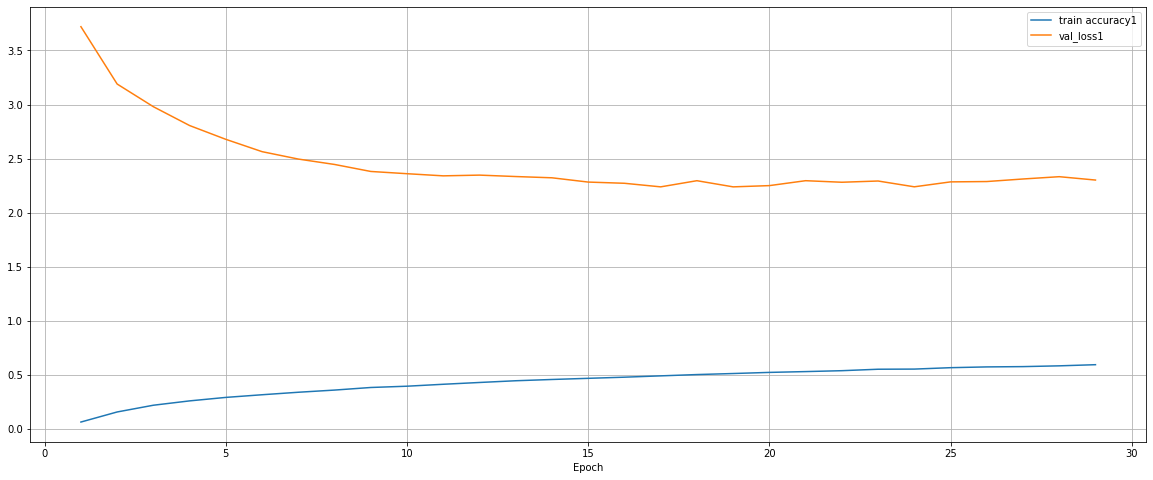

In [57]:
from tensorflow.keras.optimizers import Adam
model9.compile(
    optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',metrics=['accuracy'])
model_path = 'best-cifar100-v9.h5'
mc=ModelCheckpoint(model_path,save_best_only=True,verbose=1)
es=EarlyStopping(patience=10)

hist9=model9.fit(
    X_train,Y_train,validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[mc,es]

)
best_model = load_model(model_path)
best_model.evaluate(X_test,Y_test)
y_acc=hist9.history['accuracy']
y_vloss=hist9.history['val_loss']
xs9=np.arange(1, len(y_acc)+1)
plt.figure(figsize=(20,8))
plt.plot(xs9,y_acc,label='train accuracy1')
plt.plot(xs9,y_vloss,label='val_loss1')
plt.legend(),
plt.grid(),
plt.xlabel('Epoch')

In [58]:
best_model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 4ms/step - loss: 2.2052 - accuracy: 0.4334


[2.2051594257354736, 0.4334000051021576]

# 데이터 부풀리기

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_valid,Y_train,Y_valid = train_test_split(
    X_train,Y_train,stratify=Y_train, test_size=0.2,random_state=seed
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=[0.8,1.2],
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

In [ ]:
datagen.fit(X_train)

- 데이터 부풀리기 한 결과로 학습

In [ ]:
hist=model.fit(
    datagen.flow(X_train,Y_train,batch_size=32),
    validation_data=(X_valid,Y_valid),
    epochs=100,
    callbacks=[mc,es]
)

Epoch 1/100
1249/1250 [============================>.] - ETA: 0s - loss: 1.8980 - accuracy: 0.2967
Epoch 1: val_loss improved from inf to 1.65834, saving model to best-cifar10-v2.h5
1250/1250 [==============================] - 30s 16ms/step - loss: 1.8981 - accuracy: 0.2966 - val_loss: 1.6583 - val_accuracy: 0.4022
Epoch 2/100
1247/1250 [============================>.] - ETA: 0s - loss: 1.6367 - accuracy: 0.3990
Epoch 2: val_loss improved from 1.65834 to 1.50025, saving model to best-cifar10-v2.h5
1250/1250 [==============================] - 19s 15ms/step - loss: 1.6369 - accuracy: 0.3990 - val_loss: 1.5002 - val_accuracy: 0.4560
Epoch 3/100
1249/1250 [============================>.] - ETA: 0s - loss: 1.5411 - accuracy: 0.4397
Epoch 3: val_loss improved from 1.50025 to 1.37033, saving model to best-cifar10-v2.h5
1250/1250 [==============================] - 20s 16ms/step - loss: 1.5409 - accuracy: 0.4397 - val_loss: 1.3703 - val_accuracy: 0.5034
Epoch 4/100
1250/1250 [==================

In [ ]:
best_model = load_model(model_path)
best_model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8007 - accuracy: 0.7191


[0.8006633520126343, 0.7190999984741211]

Text(0.5, 0, 'Epoch')

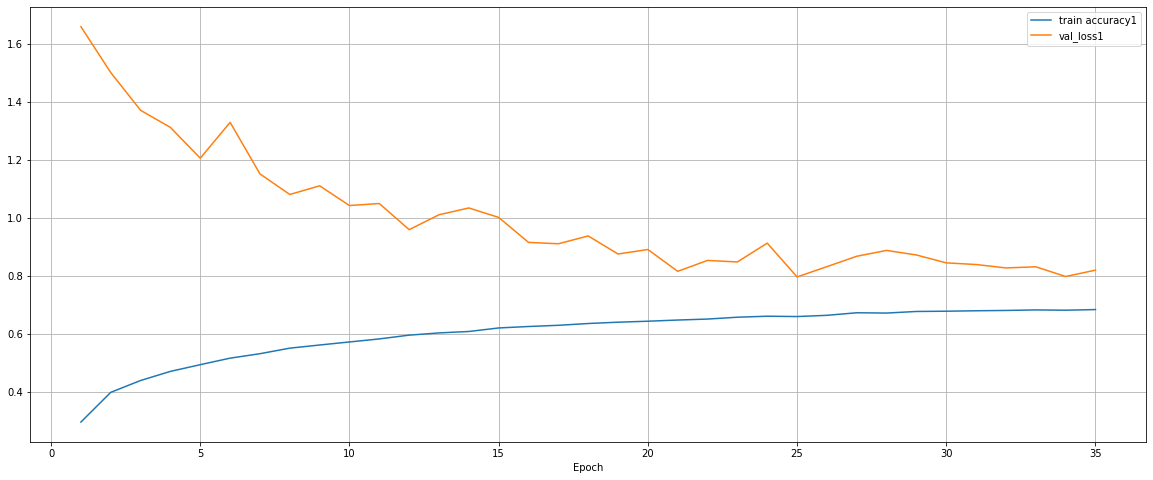

In [ ]:
y_acc=hist.history['accuracy']
y_vloss=hist.history['val_loss']
xs=np.arange(1, len(y_acc)+1)
plt.figure(figsize=(20,8))
plt.plot(xs,y_acc,label='train accuracy1')
plt.plot(xs,y_vloss,label='val_loss1')
plt.legend(),
plt.grid(),
plt.xlabel('Epoch')